In [ ]:
#os is used to navigate through file structures

In [2]:
import tensorflow as tf
import os 

In [ ]:
#gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
#gpus

In [8]:
#these following lines helps us to avoid OOM errors (Out Of Memory) when loading the data
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus:
#    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '35438_hd.jpg',
 '61vqdCPeKNL._AC_UF10001000_QL80_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '960x0.jpg',
 'compassion-900x387.jpg',
 'Composant20520E28093204.png',
 'Dollarphotoclub_76084977-1.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-1152307607_525151_wrcmhy.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'getty_494581822_130796.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35581971.jpg',
 'goup-happy-people-grou

In [6]:
image_exts = ['png', 'jpg', 'jpeg', 'bmp']

In [7]:
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, image)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in image_exts:
                print('image nit in the list{}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image{}'.format(img_path))
            

In [12]:
#tf.data.Dataset??

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
 #tf.keras.utils.image_dataset_from_directory??

In [14]:
#build image dataset no need to build the classes and the labels 
data = tf.keras.utils.image_dataset_from_directory('data')

Found 177 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
#get another batch from the iterator 
batch = data_iterator.next()

In [17]:
# 1 = Happy people
# 0 = angry people
batch[1]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

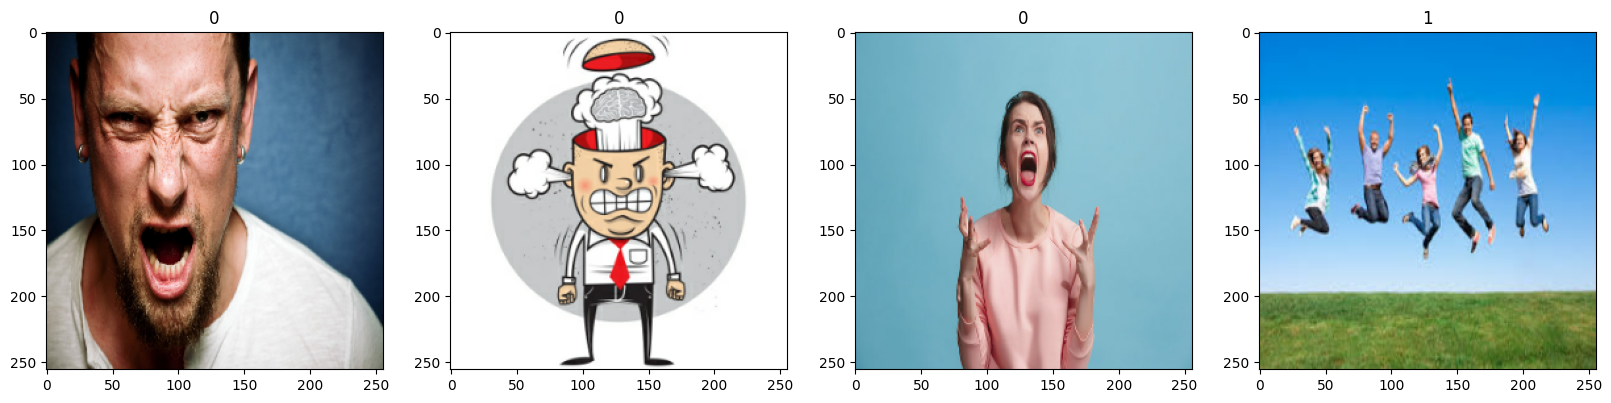

In [18]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#batch[0].max()

preprocessing the data

scaling the data

In [19]:
# x = images
# y = labels
# x/255 means that we're scaling the data so that we will have values between 0 nd 1 in order to optimize it 
data = data.map(lambda x, y: (x/255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

1.0

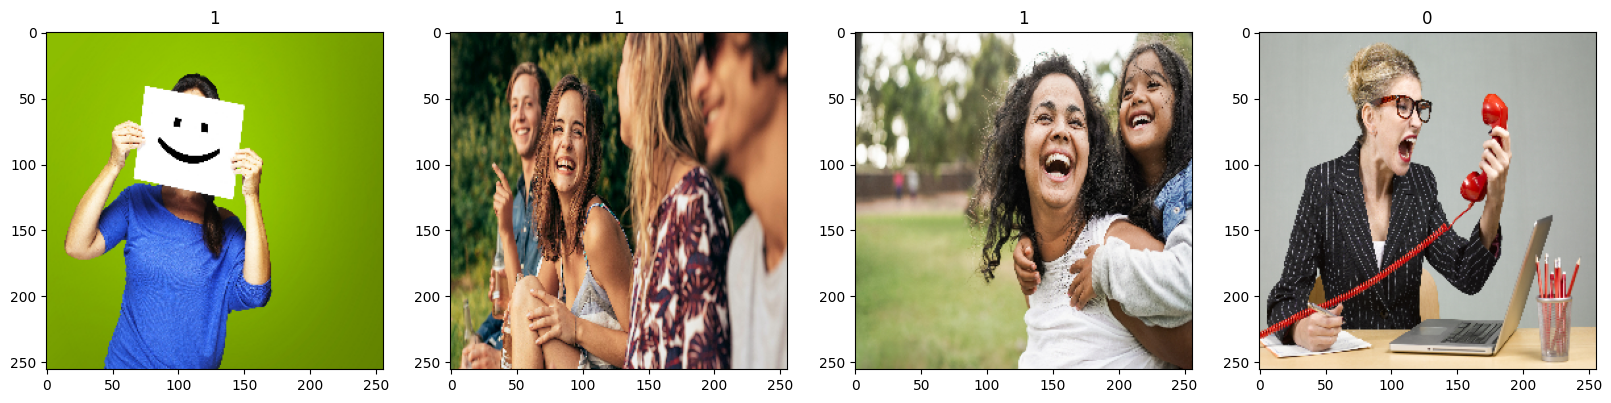

In [23]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

split data

In [24]:
len(data)

6

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1 #validation size
test_size = int(len(data)*.1)+1

In [26]:
test_size + val_size + test_size

4

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
len(test)

0

Building the dl model

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Training

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
histo = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 14s 3s/step - loss: 4.7602 - accuracy: 0.4375 - val_loss: 2.4758 - val_accuracy: 0.4490
Epoch 2/20
4/4 [==============================] - 18s 4s/step - loss: 1.1729 - accuracy: 0.4688 - val_loss: 0.6876 - val_accuracy: 0.7143
Epoch 3/20
4/4 [==============================] - 16s 4s/step - loss: 0.6876 - accuracy: 0.6172 - val_loss: 0.6911 - val_accuracy: 0.4898
Epoch 4/20
4/4 [==============================] - 11s 2s/step - loss: 0.6860 - accuracy: 0.6094 - val_loss: 0.6856 - val_accuracy: 0.5918
Epoch 5/20
4/4 [==============================] - 11s 2s/step - loss: 0.6809 - accuracy: 0.6562 - val_loss: 0.6710 - val_accuracy: 0.6939
Epoch 6/20
4/4 [==============================] - 11s 2s/step - loss: 0.6666 - accuracy: 0.7578 - val_loss: 0.6484 - val_accuracy: 0.8776
Epoch 7/20
4/4 [==============================] - 11s 2s/step - loss: 0.6221 - accuracy: 0.8125 - val_loss: 0.5552 - val_accuracy: 0.6735
Epoch 8/20
4/4 [==================

ploting the performance

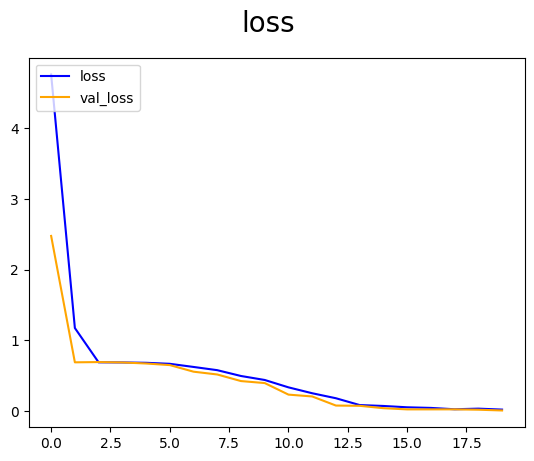

In [39]:
fig = plt.figure()
plt.plot(histo.history['loss'], color='blue', label='loss')
plt.plot(histo.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

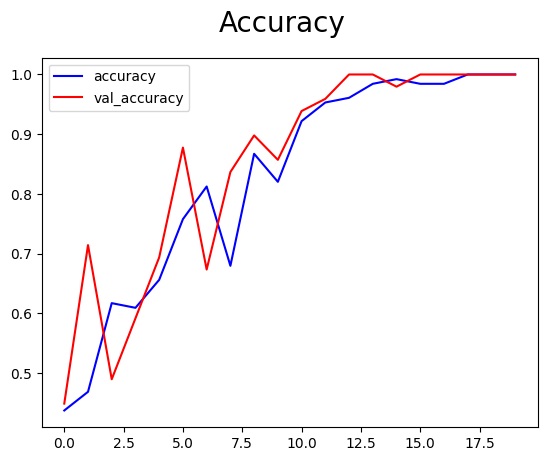

In [40]:
fig = plt.figure()
plt.plot(histo.history['accuracy'], color='blue', label='accuracy')
plt.plot(histo.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluating the performance

evaluation

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
prec = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    prec.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{prec.result.numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Testing

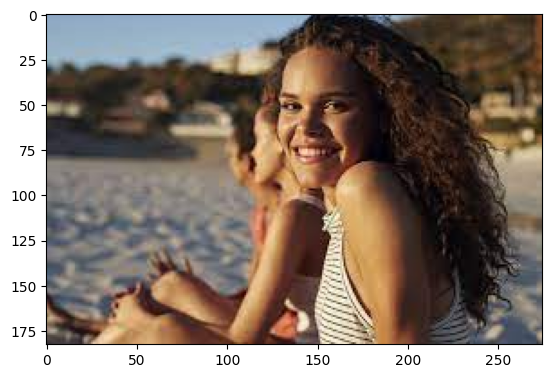

In [45]:
img = cv2.imread('./imageClassification/happy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

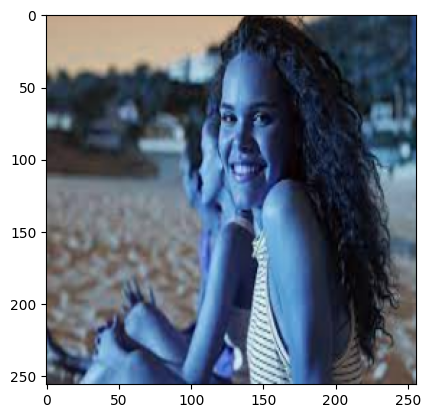

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int)) 
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 148ms/step


In [48]:
yhat

array([[0.9716174]], dtype=float32)

In [49]:
if yhat > 0.5:
    print(f'Predicted class is happy')
else:
    print(f'PRedicted class is angry')

Predicted class is happy


Saving the model

In [50]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

In [51]:
model.save(os.path.join('modelss','angryHappyModel.h5'))

In [52]:
new_model = load_model(os.path.join('modelss','angryHappyModel.h5'))

In [53]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 136ms/step


array([[0.9716174]], dtype=float32)